In [1]:
# supposed you want to extract coordinates from Gaussian run and load to pytraj

# load cclib
import cclib

gau = cclib.parser.Gaussian('GF2.log')
gau

Gaussian("GF2.log")

In [2]:
go = gau.parse()
go

In [3]:
go.atomcoords.shape, go.atomcoords.dtype

((56, 34, 3), dtype('float64'))

In [4]:
# load to pytraj's Trajectory
# we need a pdb file (or an Amber topology file, or a PSF file or anything that pytraj/cpptraj supports)
# in this case, we only need to use an original pdb file from your Gaussian run

traj = pt.Trajectory(xyz=go.atomcoords, top='GF2.pdb')
traj


<pytraj.Trajectory, 56 frames, include:
<Topology: 34 atoms, 1 residues, 1 mols, non-PBC>>
           

In [5]:
traj.xyz.shape, traj.xyz.dtype

((56, 34, 3), dtype('float64'))

In [6]:
{atom.element for atom in traj.top.atoms}

{'CARBON', 'FLUORINE', 'HYDROGEN', 'NITROGEN', 'OXYGEN', 'PHOSPHORUS'}

In [7]:
# get some insighful info, such as glycosidic angle vs time
chin = pt.calc_chin(traj)[0]
chin

<pytraj.array.DataArray: size=56, key=chin:1, dtype=float64, ndim=1> 
values:
[-165.80586142 -165.95436532 -166.27043487 ..., -116.70662514 -116.69723609
 -116.67783373]

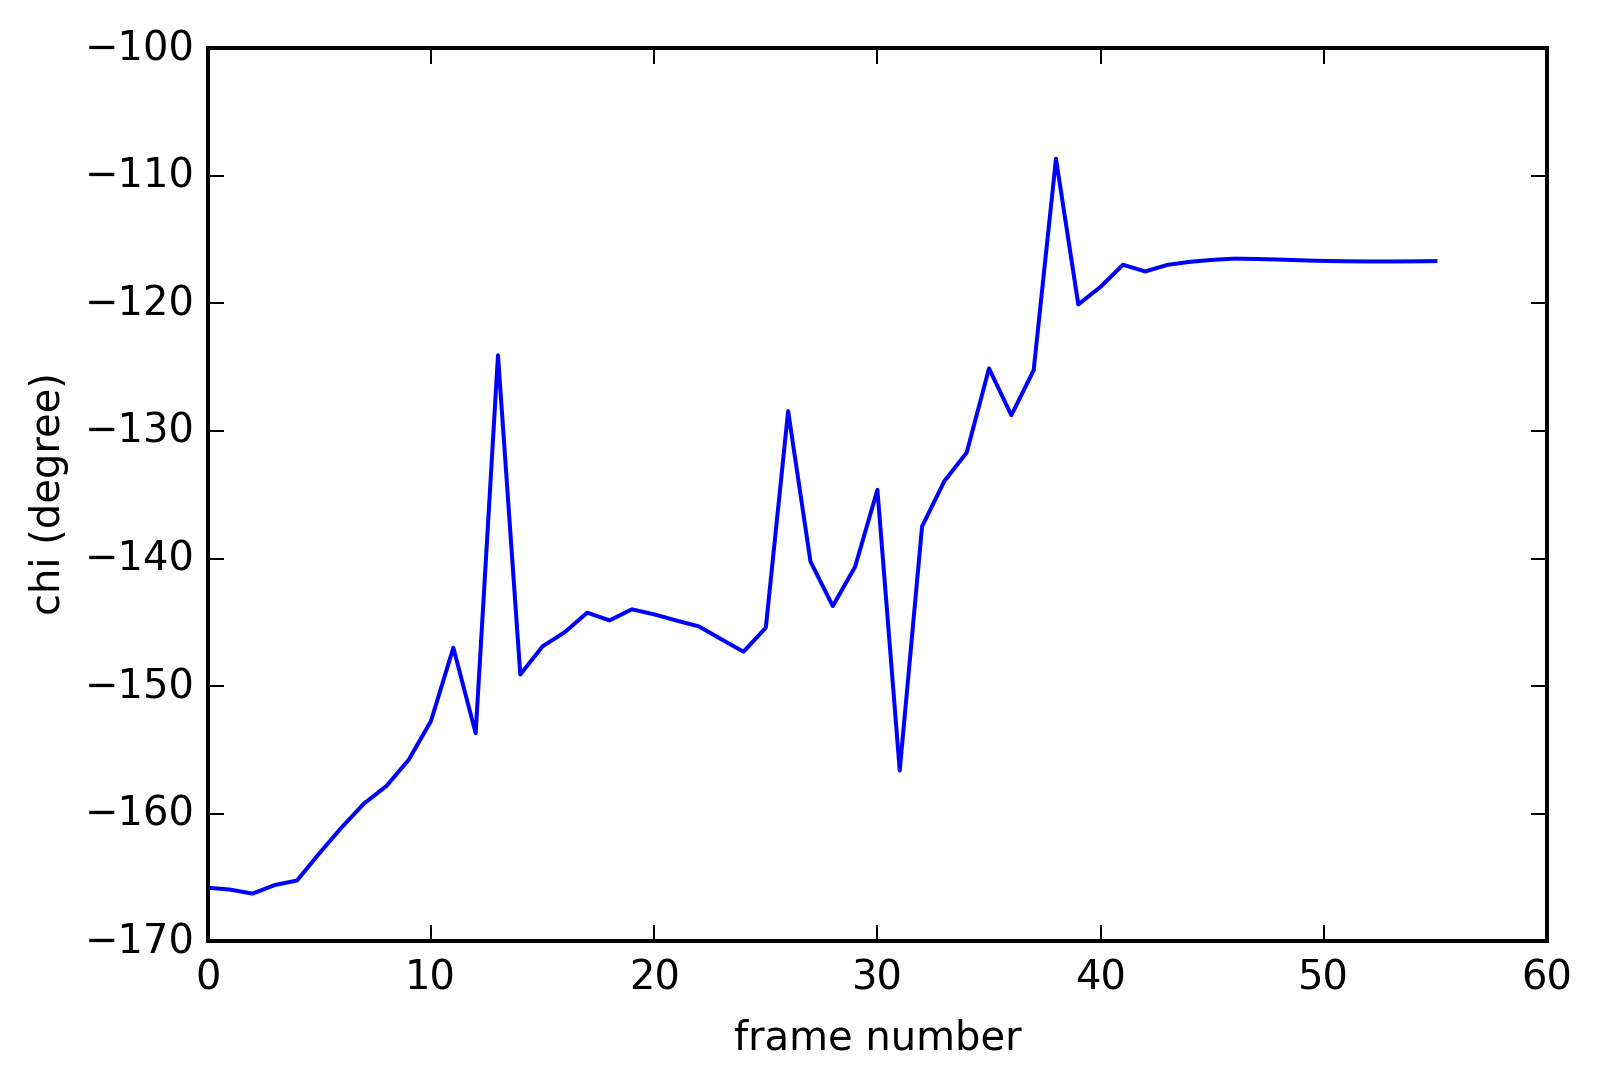

In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # high resolution
import matplotlib

from matplotlib import pyplot as plt

plt.plot(chin)
plt.xlabel('frame number')
plt.ylabel('chi (degree)')

# Note: use pytraj.tools.read_gausian_output

In [9]:
# pytraj.tools.read_gaussian_output is a simple wrapper of cclib

pt.tools.read_gaussian_output('GF2.log')

<pytraj.Trajectory, 56 frames, include:
<Topology: 34 atoms, 1 residues, 1 mols, non-PBC>>
           